# Simple Linear Regression
with random dataset


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

**Data Generation:**

I generate 300 samples with a known linear relationship
𝑦
=
2
𝑥
+
1
y=2x+1 and add Gaussian noise.
This synthetic data serves as our regression dataset.


In [27]:
num_samples = 300
X = np.random.rand(num_samples, 1)  # random x values in [0, 1)
noise = np.random.normal(0, 0.3, size=(num_samples, 1))
y = 2 * X + 1 + noise  # noise


 Convert to Pandas DataFrame for visualization

In [28]:

df = pd.DataFrame({"PovPct": X.flatten(), "TeenBrth": y.flatten()})


Visualize the Generated Data

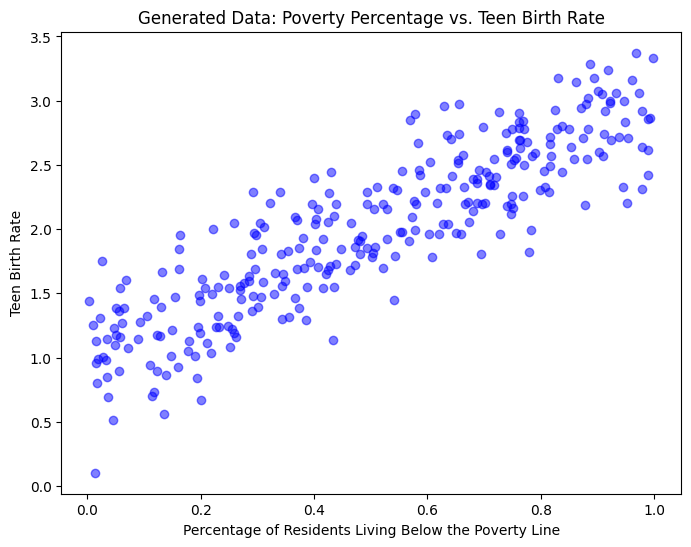

In [29]:

plt.figure(figsize=(8, 6))
plt.scatter(df['PovPct'], df['TeenBrth'], color='blue', alpha=0.5)
plt.xlabel("Percentage of Residents Living Below the Poverty Line")
plt.ylabel("Teen Birth Rate")
plt.title("Generated Data: Poverty Percentage vs. Teen Birth Rate")
plt.show()



**Data Splitting:**

The dataset is split into 80% training and 20% testing data.


In [30]:
train_ratio = 0.8
train_size = int(num_samples * train_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Build the Linear Regression Model

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Print model summary (for verification)

In [32]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.09),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

Train the Model 100 times (100 Epoch)

In [34]:
# 6. Train the Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))



Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 4.8930 - mean_squared_error: 4.8930 - val_loss: 2.4919 - val_mean_squared_error: 2.4919
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5049 - mean_squared_error: 1.5049 - val_loss: 0.4974 - val_mean_squared_error: 0.4974
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2997 - mean_squared_error: 0.2997 - val_loss: 0.2036 - val_mean_squared_error: 0.2036
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2479 - mean_squared_error: 0.2479 - val_loss: 0.2681 - val_mean_squared_error: 0.2681
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3131 - mean_squared_error: 0.3131 - val_loss: 0.2002 - val_mean_squared_error: 0.2002
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1933 - mean_squared_error: 0.1933 - val_loss: 0.1602 - val_mean_squared_error: 0.1602
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1589 - mean_squared_error: 0.1589 - val_loss: 0.1711 - val_mean_

 Evaluate the Model

In [35]:

loss, mse = model.evaluate(X_test, y_test)
print(f"Test Mean Squared Error: {mse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0931 - mean_squared_error: 0.0931
Test Mean Squared Error: 0.08783959597349167


 Plot True Values & Regression Line
 and Sort X_test and y_pred for proper line plotting

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


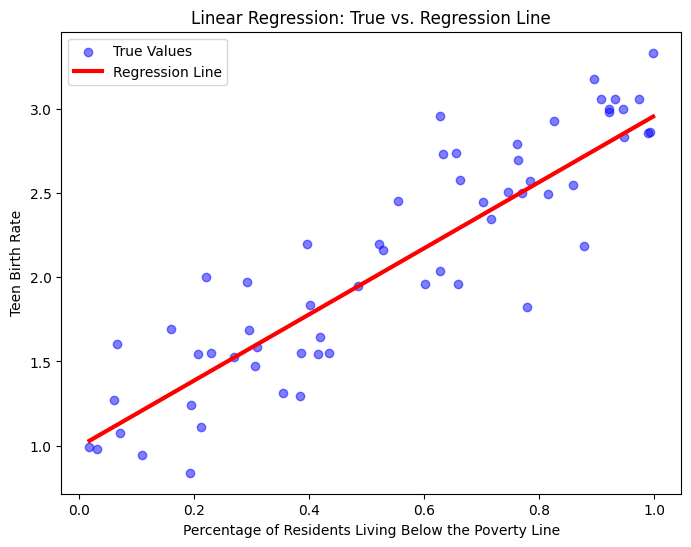

In [36]:
y_pred = model.predict(X_test)

# Sort X_test and y_pred for proper line plotting
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test.flatten()[sorted_indices]
y_pred_sorted = y_pred.flatten()[sorted_indices]

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="True Values", alpha=0.5)
plt.plot(X_test_sorted, y_pred_sorted, color='red', linewidth=3, label="Regression Line")
plt.xlabel("Percentage of Residents Living Below the Poverty Line")
plt.ylabel("Teen Birth Rate")
plt.title("Linear Regression: True vs. Regression Line")
plt.legend()
plt.show()


Plot Mean Squared Error Over Epochs

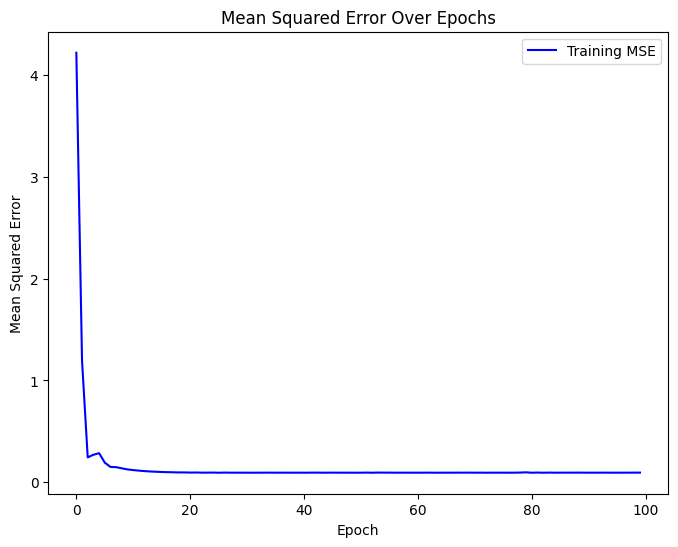

In [37]:
mse_values = history.history['mean_squared_error']

plt.figure(figsize=(8, 6))
plt.plot(mse_values, label="Training MSE", color='blue')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Over Epochs')
plt.legend()
plt.show()
